In [18]:
import plotly.graph_objs as go
import plotly.express as px
import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import GridspecLayout
import ipywidgets as widgets


In [19]:
non_vegan_products = ['Barley (Beer)','Cane Sugar','Milk','Cheese','Eggs','Fish (farmed)','Crustaceans (farmed)','Bovine Meat (beef herd)','Bovine Meat (dairy herd)','Lamb & Mutton','Pig Meat','Poultry Meat']
df_all_products = pd.read_excel("dataset1.xls", sheet_name="Results - Retail Weight", skiprows=2,nrows=43, index_col=None, na_values=["NA"])

In [20]:
#non vegan products
non_vegan = df_all_products["Product"].isin(non_vegan_products)
df_non_vegan_products = df_all_products[non_vegan]

df_non_vegan_products_land_use = df_non_vegan_products.iloc[:, [0, 3]]
print("df_non_vegan_products_land_use:")
print(df_non_vegan_products_land_use)

df_non_vegan_products_ghg_2013 = df_non_vegan_products.iloc[:, [0, 9]]
print("df_non_vegan_products_ghg_2013:")
print(df_non_vegan_products_ghg_2013)

df_non_vegan_products_ghg_2007 = df_non_vegan_products.iloc[:, [0, 15]]
print("df_non_vegan_products_ghg_2007:")
print(df_non_vegan_products_ghg_2007)

df_non_vegan_products_acid = df_non_vegan_products.iloc[:, [0, 21]]
print("df_non_vegan_products_acid:")
print(df_non_vegan_products_acid)

df_non_vegan_products_eutro = df_non_vegan_products.iloc[:, [0, 27]]
print("df_non_vegan_products_eutro:")
print(df_non_vegan_products_eutro)

df_non_vegan_products_fresh_water_withdraw = df_non_vegan_products.iloc[:, [0, 33]]
print("df_non_vegan_products_fresh_water_withdraw:")
print(df_non_vegan_products_fresh_water_withdraw)

df_non_vegan_products_stress_water_use = df_non_vegan_products.iloc[:, [0, 39]]
print("df_non_vegan_products_stress_water_use:")
print(df_non_vegan_products_stress_water_use)


print(df_non_vegan_products_land_use)
print(df_non_vegan_products_ghg_2013)
print(df_non_vegan_products_ghg_2007)
print(df_non_vegan_products_acid)
print(df_non_vegan_products_eutro)
print(df_non_vegan_products_fresh_water_withdraw)
print(df_non_vegan_products_stress_water_use)



df_non_vegan_products_land_use:
                     Product    Mean
2              Barley (Beer)    1.11
7                 Cane Sugar    2.04
33   Bovine Meat (beef herd)  326.21
34  Bovine Meat (dairy herd)   43.24
35             Lamb & Mutton  369.81
36                  Pig Meat   17.36
37              Poultry Meat   12.22
38                      Milk    8.95
39                    Cheese   87.79
40                      Eggs    6.27
41             Fish (farmed)    8.41
42      Crustaceans (farmed)    2.97
df_non_vegan_products_ghg_2013:
                     Product  Mean.1
2              Barley (Beer)    1.18
7                 Cane Sugar    3.20
33   Bovine Meat (beef herd)   99.48
34  Bovine Meat (dairy herd)   33.30
35             Lamb & Mutton   39.72
36                  Pig Meat   12.31
37              Poultry Meat    9.87
38                      Milk    3.15
39                    Cheese   23.88
40                      Eggs    4.67
41             Fish (farmed)   13.63
42      Cru

In [21]:
#vegan products
vegan = ~df_all_products['Product'].isin(non_vegan_products)
df_vegan_products = df_all_products[vegan]

df_vegan_products_land_use = df_vegan_products.iloc[:, [0, 3]]
print("df_vegan_products_land_use:")
print(df_vegan_products_land_use)

df_vegan_products_ghg_2013 = df_vegan_products.iloc[:, [0, 9]]
print("df_vegan_products_ghg_2013:")
print(df_vegan_products_ghg_2013)

df_vegan_products_ghg_2007 = df_vegan_products.iloc[:, [0, 15]]
print("df_vegan_products_ghg_2007:")
print(df_vegan_products_ghg_2007)

df_vegan_products_acid = df_vegan_products.iloc[:, [0, 21]]
print("df_vegan_products_acid:")
print(df_vegan_products_acid)

df_vegan_products_eutro = df_vegan_products.iloc[:, [0, 27]]
print("df_vegan_products_eutro:")
print(df_vegan_products_eutro)

df_vegan_products_fresh_water_withdraw = df_vegan_products.iloc[:, [0, 33]]
print("df_vegan_products_fresh_water_withdraw:")
print(df_vegan_products_fresh_water_withdraw)

df_vegan_products_stress_water_use = df_vegan_products.iloc[:, [0, 39]]
print("df_vegan_products_stress_water_use:")
print(df_vegan_products_stress_water_use)


df_vegan_products_land_use:
                Product   Mean
0   Wheat & Rye (Bread)   3.85
1          Maize (Meal)   2.94
3               Oatmeal   7.60
4                  Rice   2.80
5              Potatoes   0.88
6               Cassava   1.81
8            Beet Sugar   1.83
9          Other Pulses  15.57
10                 Peas   7.46
11                 Nuts  12.96
12           Groundnuts   9.11
13              Soymilk   0.66
14                 Tofu   3.52
15          Soybean Oil  10.52
16             Palm Oil   2.42
17        Sunflower Oil  17.66
18         Rapeseed Oil  10.63
19            Olive Oil  26.31
20             Tomatoes   0.80
21       Onions & Leeks   0.39
22      Root Vegetables   0.33
23            Brassicas   0.55
24     Other Vegetables   0.38
25         Citrus Fruit   0.86
26              Bananas   1.93
27               Apples   0.63
28     Berries & Grapes   2.41
29                 Wine   1.78
30          Other Fruit   0.89
31               Coffee  21.62
32       Da

In [22]:
import plotly.graph_objects as go

def create_sunburst_figure(title, values):
    colors = ['darkgreen', 'darkred'] * 2  
    fig = go.Figure(go.Sunburst(
        labels=labels,
        parents=parents,
        values=values,
        marker=dict(colors=colors),
    ))
    
    fig.update_layout(title=title)
    fig.show()
categories = ['Land use', 'GHG emission 2013', 'GHG emission 2007', 'Acidification', 'Eutrophication', 'Fresh Water Withdrawal', 'Stress Water Use']

labels = ["", "Non-vegan", "Vegan"] + list(df_non_vegan_products["Product"]) + list(df_vegan_products["Product"])
parents = ["", "", ""] + ["Non-vegan"] * len(df_non_vegan_products) + ["Vegan"] * len(df_vegan_products)

# Land use
values = [0] * 3 + list(df_non_vegan_products_land_use["Mean"]) + list(df_vegan_products_land_use["Mean"])
create_sunburst_figure("Land use", values)

# GHG emission 2013
values = [0] * 3 + list(df_non_vegan_products_ghg_2013["Mean.1"]) + list(df_vegan_products_ghg_2013["Mean.1"])
create_sunburst_figure("GHG emission 2013", values)

# GHG emission 2007
values = [0] * 3 + list(df_non_vegan_products_ghg_2007["Mean.2"]) + list(df_vegan_products_ghg_2007["Mean.2"])
create_sunburst_figure("GHG emission 2007", values)

# Acidification
values = [0] * 3 + list(df_non_vegan_products_acid["Mean.3"]) + list(df_vegan_products_acid["Mean.3"])
create_sunburst_figure("Acidification", values)

# Eutrophication
values = [0] * 3 + list(df_non_vegan_products_eutro["Mean.4"]) + list(df_vegan_products_eutro["Mean.4"])
create_sunburst_figure("Eutrophication", values)

# Fresh Water Withdrawal
values = [0] * 3 + list(df_non_vegan_products_fresh_water_withdraw["Mean.5"]) + list(df_vegan_products_fresh_water_withdraw["Mean.5"])
create_sunburst_figure("Fresh Water Withdrawal", values)

# Stress Water Use
values = [0] * 3 + list(df_non_vegan_products_stress_water_use["Mean.6"]) + list(df_vegan_products_stress_water_use["Mean.6"])
create_sunburst_figure("Stress Water Use", values)


In [23]:
import plotly.graph_objects as go

# Define the data for the bar plots
categories = ['Land use', 'GHG emission 2013', 'GHG emission 2007', 'Acidification', 'Eutrophication', 'Fresh Water Withdrawal', 'Stress Water Use']
vegan_values = [df_vegan_products_land_use["Mean"].sum(),
                df_vegan_products_ghg_2013["Mean.1"].sum(),
                df_vegan_products_ghg_2007["Mean.2"].sum(),
                df_vegan_products_acid["Mean.3"].sum(),
                df_vegan_products_eutro["Mean.4"].sum(),
                df_vegan_products_fresh_water_withdraw["Mean.5"].sum(),
                df_vegan_products_stress_water_use["Mean.6"].sum()]
non_vegan_values = [df_non_vegan_products_land_use["Mean"].sum(),
                    df_non_vegan_products_ghg_2013["Mean.1"].sum(),
                    df_non_vegan_products_ghg_2007["Mean.2"].sum(),
                    df_non_vegan_products_acid["Mean.3"].sum(),
                    df_non_vegan_products_eutro["Mean.4"].sum(),
                    df_non_vegan_products_fresh_water_withdraw["Mean.5"].sum(),
                    df_non_vegan_products_stress_water_use["Mean.6"].sum()]
values = ['Land Use (m2/FU)', 'GHG Emissions (kg CO2eq/FU)', 'GHG Emissions (kg CO2eq/FU)', 'Acidifying Emissions (g SO2eq/FU)', 'Eutrophying Emissions (g PO43-eq/FU)', 'Freshwater Withdrawals (L/FU)', 'Stress-Weighted Water Use (L/FU)']


for category, vegan_value, non_vegan_value in zip(categories, vegan_values, non_vegan_values):
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=['Vegan', 'Non-vegan'],
        y=[vegan_value, non_vegan_value],
        name=category,
        marker_color=['darkgreen','darkred']  
    ))

    fig.update_layout(
        title=f'Environmental Impact: {category}',
        xaxis_title='Product Type',
        yaxis_title= values[categories.index(category)]
    )
    
    fig.show()


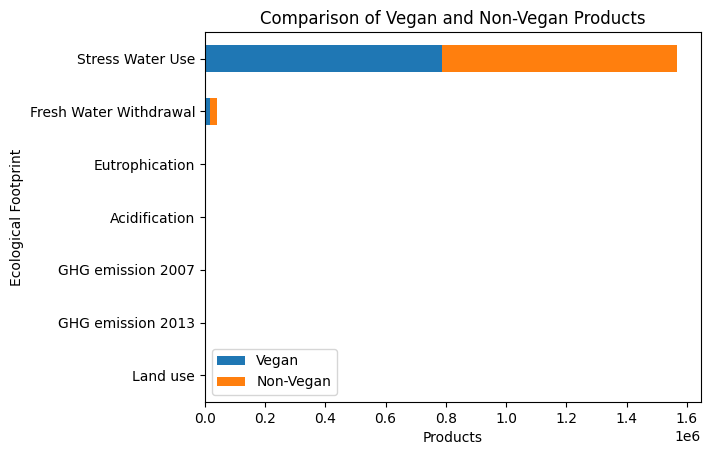

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame with the data
df = pd.DataFrame({
    'Category': ['Land use', 'GHG emission 2013', 'GHG emission 2007', 'Acidification', 'Eutrophication', 'Fresh Water Withdrawal', 'Stress Water Use'],
    'Vegan': vegan_values,
    'Non-Vegan': non_vegan_values
})

# Set the 'Product' column as the index
df.set_index('Category', inplace=True)

# Plotting the stacked bar chart
ax = df.plot(kind='barh', stacked=True)

# Setting the labels and title
ax.set_xlabel('Products')
ax.set_ylabel('Ecological Footprint')
ax.set_title('Comparison of Vegan and Non-Vegan Products')

# Display the legend
ax.legend()

# Show the chart
plt.show()


In [25]:
#Mauro
non_vegan_products = ['Barley (Beer)','Cane Sugar','Milk','Cheese','Eggs','Fish (farmed)','Crustaceans (farmed)','Bovine Meat (beef herd)','Bovine Meat (dairy herd)','Lamb & Mutton','Pig Meat','Poultry Meat']
meat_products = ['Bovine Meat (beef herd)', 'Bovine Meat (dairy herd)', 'Lamb & Mutton', 'Pig Meat','Poultry Meat','Fish (farmed)','Crustaceans (farmed)']
dairy_products = ['Milk','Cheese','Eggs']
other_non_vegan_products = ['Cane Sugar','Crustaceans (farmed)','Barley (Beer)']

df_all_products = pd.read_excel("dataset1.xls", sheet_name="Results - Retail Weight", skiprows=2,nrows=43, index_col=None, na_values=["NA"])

#non vegan products
non_vegan = df_all_products["Product"].isin(non_vegan_products)
meat = df_all_products["Product"].isin(meat_products)
dairy = df_all_products["Product"].isin(dairy_products)
other_non_vegan = df_all_products["Product"].isin(other_non_vegan_products)

df_non_vegan_products = df_all_products[non_vegan]
df_meat_products = df_all_products[meat]
df_dairy_products = df_all_products[dairy]
df_other_non_vegan_products = df_all_products[other_non_vegan]

#non vegan
df_non_vegan_products_land_use = df_non_vegan_products.iloc[:, [0, 3]]
df_non_vegan_products_ghg_2013 = df_non_vegan_products.iloc[:, [0, 9]]
df_non_vegan_products_ghg_2007 = df_non_vegan_products.iloc[:, [0, 15]]
df_non_vegan_products_acid = df_non_vegan_products.iloc[:, [0, 21]]
df_non_vegan_products_eutro = df_non_vegan_products.iloc[:, [0, 27]]
df_non_vegan_products_fresh_water_withdraw = df_non_vegan_products.iloc[:, [0, 33]]
df_non_vegan_products_stress_water_use = df_non_vegan_products.iloc[:, [0, 39]]

#meat products
df_meat_products_land_use = df_meat_products.iloc[:, [0, 3]]
df_meat_products_ghg_2013 = df_meat_products.iloc[:, [0, 9]]
df_meat_products_ghg_2007 = df_meat_products.iloc[:, [0, 15]]
df_meat_products_acid = df_meat_products.iloc[:, [0, 21]]
df_meat_products_eutro = df_meat_products.iloc[:, [0, 27]]
df_meat_products_fresh_water_withdraw = df_meat_products.iloc[:, [0, 33]]
df_meat_products_stress_water_use = df_meat_products.iloc[:, [0, 39]]
#dairy
df_dairy_products_land_use = df_dairy_products.iloc[:, [0, 3]]
df_dairy_products_ghg_2013 = df_dairy_products.iloc[:, [0, 9]]
df_dairy_products_ghg_2007 = df_dairy_products.iloc[:, [0, 15]]
df_dairy_products_acid = df_dairy_products.iloc[:, [0, 21]]
df_dairy_products_eutro = df_dairy_products.iloc[:, [0, 27]]
df_dairy_products_fresh_water_withdraw = df_dairy_products.iloc[:, [0, 33]]
df_dairy_products_stress_water_use = df_dairy_products.iloc[:, [0, 39]]

#other non vegan
df_other_non_vegan_products_land_use = df_other_non_vegan_products.iloc[:, [0, 3]]
df_other_non_vegan_products_ghg_2013 = df_other_non_vegan_products.iloc[:, [0, 9]]
df_other_non_vegan_products_ghg_2007 = df_other_non_vegan_products.iloc[:, [0, 15]]
df_other_non_vegan_products_acid = df_other_non_vegan_products.iloc[:, [0, 21]]
df_other_non_vegan_products_eutro = df_other_non_vegan_products.iloc[:, [0, 27]]
df_other_non_vegan_products_fresh_water_withdraw = df_other_non_vegan_products.iloc[:, [0, 33]]
df_other_non_vegan_products_stress_water_use = df_other_non_vegan_products.iloc[:, [0, 39]]


#vegan products
grains_products = ['Wheat & Rye (Bread)', 'Maize (Meal)', 'Oatmeal', 'Rice']
vegetables_products = ['Potatoes', 'Cassava', 'Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Brassicas', 'Other Vegetables']
fruits_products = ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit']
legumes_products = ['Other Pulses', 'Peas', 'Nuts', 'Groundnuts']
plant_based_alternatives_products = ['Soymilk', 'Tofu']
oils_products = ['Soybean Oil', 'Sunflower Oil', 'Olive Oil']
others_products = ['Coffee', 'Dark Chocolate']

vegan = ~df_all_products['Product'].isin(non_vegan_products)
grains = df_all_products["Product"].isin(grains_products)
vegetables = df_all_products["Product"].isin(vegetables_products)
fruits = df_all_products["Product"].isin(fruits_products)
legumes = df_all_products["Product"].isin(legumes_products)
plant_based_alternatives = df_all_products["Product"].isin(plant_based_alternatives_products)
oils = df_all_products["Product"].isin(oils_products)
others = df_all_products["Product"].isin(others_products)


df_vegan_products = df_all_products[vegan]
df_grains_products = df_all_products[grains]
df_vegetables_products = df_all_products[vegetables]
df_fruits_products = df_all_products[fruits]
df_legumes_products = df_all_products[legumes]
df_plant_based_alternatives_products = df_all_products[plant_based_alternatives]
df_oils_products = df_all_products[oils]
df_others_products = df_all_products[others]

#vegan
df_vegan_products_land_use = df_vegan_products.iloc[:, [0, 3]]
df_vegan_products_ghg_2013 = df_vegan_products.iloc[:, [0, 9]]
df_vegan_products_ghg_2007 = df_vegan_products.iloc[:, [0, 15]]
df_vegan_products_acid = df_vegan_products.iloc[:, [0, 21]]
df_vegan_products_eutro = df_vegan_products.iloc[:, [0, 27]]
df_vegan_products_fresh_water_withdraw = df_vegan_products.iloc[:, [0, 33]]
df_vegan_products_stress_water_use = df_vegan_products.iloc[:, [0, 39]]





In [26]:
#NO USE
# Define the data for the bar plots
categories = ['Land use', 'GHG emission 2013', 'GHG emission 2007', 'Acidification', 'Eutrophication', 'Fresh Water Withdrawal', 'Stress Water Use']
vegan_values = [df_vegan_products_land_use["Mean"].sum(),
                df_vegan_products_ghg_2013["Mean.1"].sum(),
                df_vegan_products_ghg_2007["Mean.2"].sum(),
                df_vegan_products_acid["Mean.3"].sum(),
                df_vegan_products_eutro["Mean.4"].sum(),
                df_vegan_products_fresh_water_withdraw["Mean.5"].sum(),
                df_vegan_products_stress_water_use["Mean.6"].sum()]
non_vegan_values = [df_non_vegan_products_land_use["Mean"].sum(),
                    df_non_vegan_products_ghg_2013["Mean.1"].sum(),
                    df_non_vegan_products_ghg_2007["Mean.2"].sum(),
                    df_non_vegan_products_acid["Mean.3"].sum(),
                    df_non_vegan_products_eutro["Mean.4"].sum(),
                    df_non_vegan_products_fresh_water_withdraw["Mean.5"].sum(),
                    df_non_vegan_products_stress_water_use["Mean.6"].sum()]
values = ['Land Use (m2/FU)', 'GHG Emissions (kg CO2eq/FU)', 'GHG Emissions (kg CO2eq/FU)', 'Acidifying Emissions (g SO2eq/FU)', 'Eutrophying Emissions (g PO43-eq/FU)', 'Freshwater Withdrawals (L/FU)', 'Stress-Weighted Water Use (L/FU)']



# function to create sunbursts    
def create_sunburst_figure(title, values):
    colors = ['darkgreen', 'darkred'] * 2  
    fig = go.Figure(go.Sunburst(
        labels=labels,
        parents=parents,
        values=values,
        marker=dict(colors=colors),
    ))
    
    fig.update_layout(title=title)
    return fig

labels = ["", "Non-vegan", "Vegan"] + list(df_non_vegan_products["Product"]) + list(df_vegan_products["Product"])
parents = ["", "", ""] + ["Non-vegan"] * len(df_non_vegan_products) + ["Vegan"] * len(df_vegan_products)

#Creating the sunbursts

# Land use
values = [0] * 3 + list(df_non_vegan_products_land_use["Mean"]) + list(df_vegan_products_land_use["Mean"])
data1 = create_sunburst_figure("Land use", values)
# GHG emission 2013
values = [0] * 3 + list(df_non_vegan_products_ghg_2013["Mean.1"]) + list(df_vegan_products_ghg_2013["Mean.1"])
data2 = create_sunburst_figure("GHG emission 2013", values)
# GHG emission 2007
values = [0] * 3 + list(df_non_vegan_products_ghg_2007["Mean.2"]) + list(df_vegan_products_ghg_2007["Mean.2"])
data3 = create_sunburst_figure("GHG emission 2007", values)

# Acidification
values = [0] * 3 + list(df_non_vegan_products_acid["Mean.3"]) + list(df_vegan_products_acid["Mean.3"])
data4 = create_sunburst_figure("Acidification", values)

# Eutrophication
values = [0] * 3 + list(df_non_vegan_products_eutro["Mean.4"]) + list(df_vegan_products_eutro["Mean.4"])
data5 = create_sunburst_figure("Eutrophication", values)

# Fresh Water Withdrawal
values = [0] * 3 + list(df_non_vegan_products_fresh_water_withdraw["Mean.5"]) + list(df_vegan_products_fresh_water_withdraw["Mean.5"])
data6 = create_sunburst_figure("Fresh Water Withdrawal", values)

# Stress Water Use
values = [0] * 3 + list(df_non_vegan_products_stress_water_use["Mean.6"]) + list(df_vegan_products_stress_water_use["Mean.6"])
data7 = create_sunburst_figure("Stress Water Use", values)

#Creating the figure
specs_list1 = []
specs_list2 = []

for i in range(len(categories)):
    specs_list1.append({'type': 'bar'})
for i in range(len(categories)):
    specs_list2.append({"type": "sunburst"})
specs_list = [specs_list2, specs_list1]
fig = make_subplots(rows=2, cols=len(categories), specs= specs_list)

#Creating and adding the barplots to the figure
for category, vegan_value, non_vegan_value in zip(categories, vegan_values, non_vegan_values):
    fig.add_trace(go.Bar(
        x=['Vegan', 'Non-vegan'],
        y=[vegan_value, non_vegan_value],
        name=category,
        marker_color=['darkgreen','darkred']  
    ), row= 2, col= categories.index(category)+ 1)

    fig.update_layout(
        title=f'Environmental Impact: {category}',
        xaxis_title='Product Type',
        yaxis_title= values[categories.index(category)]
    )
#Adding sunbursts to the figure
fig.add_trace(data1.data[0], row=1, col=1)
fig.add_trace(data2.data[0], row=1, col=2)
fig.add_trace(data3.data[0], row=1, col=3)
fig.add_trace(data4.data[0], row=1, col=4)
fig.add_trace(data5.data[0], row=1, col=5)
fig.add_trace(data6.data[0], row=1, col=6)
fig.add_trace(data7.data[0], row=1, col=7)

fig.show()

NameError: name 'make_subplots' is not defined

In [27]:
#NO USE
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the data for the bar plots
categories = ['Land use', 'GHG emission 2013', 'GHG emission 2007', 'Acidification', 'Eutrophication', 'Fresh Water Withdrawal', 'Stress Water Use']
vegan_values = [df_vegan_products_land_use["Mean"].sum(),
                df_vegan_products_ghg_2013["Mean.1"].sum(),
                df_vegan_products_ghg_2007["Mean.2"].sum(),
                df_vegan_products_acid["Mean.3"].sum(),
                df_vegan_products_eutro["Mean.4"].sum(),
                df_vegan_products_fresh_water_withdraw["Mean.5"].sum(),
                df_vegan_products_stress_water_use["Mean.6"].sum()]
non_vegan_values = [df_non_vegan_products_land_use["Mean"].sum(),
                    df_non_vegan_products_ghg_2013["Mean.1"].sum(),
                    df_non_vegan_products_ghg_2007["Mean.2"].sum(),
                    df_non_vegan_products_acid["Mean.3"].sum(),
                    df_non_vegan_products_eutro["Mean.4"].sum(),
                    df_non_vegan_products_fresh_water_withdraw["Mean.5"].sum(),
                    df_non_vegan_products_stress_water_use["Mean.6"].sum()]
yaxvalues = ['(m2/FU)', '(kg CO2eq/FU)', '(kg CO2eq/FU)', '(g SO2eq/FU)', '(g PO43-eq/FU)', '(L/FU)', '(L/FU)']

# function to create sunbursts    
def create_sunburst_figure(title, values):
    colors = ['darkgreen', 'darkred'] * 2  
    fig = go.Figure(go.Sunburst(
        labels=labels,
        parents=parents,
        values=values,
        marker=dict(colors=colors),
    ))
    
    fig.update_layout(title=title)
    return fig

labels = ["", "Non-vegan", "Vegan"] + list(df_non_vegan_products["Product"]) + list(df_vegan_products["Product"])
parents = ["", "", ""] + ["Non-vegan"] * len(df_non_vegan_products) + ["Vegan"] * len(df_vegan_products)

# Creating the sunbursts
# Land use
values = [0] * 3 + list(df_non_vegan_products_land_use["Mean"]) + list(df_vegan_products_land_use["Mean"])
data1 = create_sunburst_figure("Land use", values)
# GHG emission 2013
values = [0] * 3 + list(df_non_vegan_products_ghg_2013["Mean.1"]) + list(df_vegan_products_ghg_2013["Mean.1"])
data2 = create_sunburst_figure("GHG emission 2013", values)
# GHG emission 2007
values = [0] * 3 + list(df_non_vegan_products_ghg_2007["Mean.2"]) + list(df_vegan_products_ghg_2007["Mean.2"])
data3 = create_sunburst_figure("GHG emission 2007", values)
# Acidification
values = [0] * 3 + list(df_non_vegan_products_acid["Mean.3"]) + list(df_vegan_products_acid["Mean.3"])
data4 = create_sunburst_figure("Acidification", values)
# Eutrophication
values = [0] * 3 + list(df_non_vegan_products_eutro["Mean.4"]) + list(df_vegan_products_eutro["Mean.4"])
data5 = create_sunburst_figure("Eutrophication", values)
# Fresh Water Withdrawal
values = [0] * 3 + list(df_non_vegan_products_fresh_water_withdraw["Mean.5"]) + list(df_vegan_products_fresh_water_withdraw["Mean.5"])
data6 = create_sunburst_figure("Fresh Water Withdrawal", values)
# Stress Water Use
values = [0] * 3 + list(df_non_vegan_products_stress_water_use["Mean.6"]) + list(df_vegan_products_stress_water_use["Mean.6"])
data7 = create_sunburst_figure("Stress Water Use", values)

# Creating the figure
specs_list1 = []
specs_list2 = []

for i in range(len(categories)):
    specs_list1.append({'type': 'bar'})
for i in range(len(categories)):
    specs_list2.append({"type": "sunburst"})
specs_list = [specs_list2, specs_list1]
fig = make_subplots(rows=2, cols=len(categories), specs=specs_list)

# Creating and adding the bar plots to the figure
for category, vegan_value, non_vegan_value in zip(categories, vegan_values, non_vegan_values):
    fig.add_trace(go.Bar(
        x=['Vegan', 'Non-vegan'],
        y=[vegan_value, non_vegan_value],
        name=category,
        marker_color=['darkgreen', 'darkred']
    ), row=2, col=categories.index(category) + 1)

    fig.update_xaxes(title_text=category, row=2, col=categories.index(category) + 1)
    fig.update_yaxes(title_text=yaxvalues[categories.index(category)], row=2, col=categories.index(category) + 1)

# Adding sunbursts to the figure
fig.add_trace(data1.data[0], row=1, col=1)
fig.add_trace(data2.data[0], row=1, col=2)
fig.add_trace(data3.data[0], row=1, col=3)
fig.add_trace(data4.data[0], row=1, col=4)
fig.add_trace(data5.data[0], row=1, col=5)
fig.add_trace(data6.data[0], row=1, col=6)
fig.add_trace(data7.data[0], row=1, col=7)

fig.show()


In [28]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the data for the bar plots
categories = ['Land use', 'GHG emission 2013', 'GHG emission 2007', 'Acidification', 'Eutrophication', 'Fresh Water Withdrawal', 'Stress Water Use']
vegan_values = [df_vegan_products_land_use["Mean"].sum(),
                df_vegan_products_ghg_2013["Mean.1"].sum(),
                df_vegan_products_ghg_2007["Mean.2"].sum(),
                df_vegan_products_acid["Mean.3"].sum(),
                df_vegan_products_eutro["Mean.4"].sum(),
                df_vegan_products_fresh_water_withdraw["Mean.5"].sum(),
                df_vegan_products_stress_water_use["Mean.6"].sum()]
non_vegan_values = [df_non_vegan_products_land_use["Mean"].sum(),
                    df_non_vegan_products_ghg_2013["Mean.1"].sum(),
                    df_non_vegan_products_ghg_2007["Mean.2"].sum(),
                    df_non_vegan_products_acid["Mean.3"].sum(),
                    df_non_vegan_products_eutro["Mean.4"].sum(),
                    df_non_vegan_products_fresh_water_withdraw["Mean.5"].sum(),
                    df_non_vegan_products_stress_water_use["Mean.6"].sum()]
yaxvalues = ['(m2/FU)', '(kg CO2eq/FU)', '(kg CO2eq/FU)', '(g SO2eq/FU)', '(g PO43-eq/FU)', '(L/FU)', '(L/FU)']

# function to create sunbursts    
def create_sunburst_figure(title, values):
    colors = ['darkgreen', 'darkred'] * 2  
    fig = go.Figure(go.Sunburst(
        labels=labels,
        parents=parents,
        values=values,
        marker=dict(colors=colors),
    ))
    
    fig.update_layout(title=title)
    return fig

labels = ["", "Non-vegan", "Vegan"] + list(df_non_vegan_products["Product"]) + list(df_vegan_products["Product"])
parents = ["", "", ""] + ["Non-vegan"] * len(df_non_vegan_products) + ["Vegan"] * len(df_vegan_products)

# Creating the sunbursts
# Land use
values = [0] * 3 + list(df_non_vegan_products_land_use["Mean"]) + list(df_vegan_products_land_use["Mean"])
data1 = create_sunburst_figure("Land use", values)
# GHG emission 2013
values = [0] * 3 + list(df_non_vegan_products_ghg_2013["Mean.1"]) + list(df_vegan_products_ghg_2013["Mean.1"])
data2 = create_sunburst_figure("GHG emission 2013", values)
# GHG emission 2007
values = [0] * 3 + list(df_non_vegan_products_ghg_2007["Mean.2"]) + list(df_vegan_products_ghg_2007["Mean.2"])
data3 = create_sunburst_figure("GHG emission 2007", values)
# Acidification
values = [0] * 3 + list(df_non_vegan_products_acid["Mean.3"]) + list(df_vegan_products_acid["Mean.3"])
data4 = create_sunburst_figure("Acidification", values)
# Eutrophication
values = [0] * 3 + list(df_non_vegan_products_eutro["Mean.4"]) + list(df_vegan_products_eutro["Mean.4"])
data5 = create_sunburst_figure("Eutrophication", values)
# Fresh Water Withdrawal
values = [0] * 3 + list(df_non_vegan_products_fresh_water_withdraw["Mean.5"]) + list(df_vegan_products_fresh_water_withdraw["Mean.5"])
data6 = create_sunburst_figure("Fresh Water Withdrawal", values)
# Stress Water Use
values = [0] * 3 + list(df_non_vegan_products_stress_water_use["Mean.6"]) + list(df_vegan_products_stress_water_use["Mean.6"])
data7 = create_sunburst_figure("Stress Water Use", values)

# Creating the figure
specs_list1 = []
specs_list2 = []

for i in range(len(categories)):
    specs_list1.append({'type': 'bar'})
for i in range(len(categories)):
    specs_list2.append({"type": "sunburst"})
specs_list = [specs_list2, specs_list1]

fig = make_subplots(rows=2, cols=len(categories), specs=specs_list, vertical_spacing=0.2)

# Creating and adding the bar plots to the figure
for category, vegan_value, non_vegan_value in zip(categories, vegan_values, non_vegan_values):
    fig.add_trace(go.Bar(
        x=['Vegan', 'Non-vegan'],
        y=[vegan_value, non_vegan_value],
        name=category,
        marker_color=['darkgreen', 'darkred']
    ), row=2, col=categories.index(category) + 1)

    fig.update_xaxes(title_text=category, row=2, col=categories.index(category) + 1)
    fig.update_yaxes(title_text=yaxvalues[categories.index(category)], row=2, col=categories.index(category) + 1)

# Adding sunbursts to the figure
fig.add_trace(data1.data[0], row=1, col=1)
fig.add_trace(data2.data[0], row=1, col=2)
fig.add_trace(data3.data[0], row=1, col=3)
fig.add_trace(data4.data[0], row=1, col=4)
fig.add_trace(data5.data[0], row=1, col=5)
fig.add_trace(data6.data[0], row=1, col=6)
fig.add_trace(data7.data[0], row=1, col=7)

fig.update_layout(width = 2250, height=800, showlegend=False)
fig.show()


In [29]:
#DONT USE
#Mauro

non_vegan_products = ['Barley (Beer)','Cane Sugar','Milk','Cheese','Eggs','Fish (farmed)','Crustaceans (farmed)','Bovine Meat (beef herd)','Bovine Meat (dairy herd)','Lamb & Mutton','Pig Meat','Poultry Meat']
meat_products = ['Bovine Meat (beef herd)', 'Bovine Meat (dairy herd)', 'Lamb & Mutton', 'Pig Meat','Poultry Meat','Fish (farmed)','Crustaceans (farmed)']
dairy_products = ['Milk','Cheese','Eggs']
other_non_vegan_products = ['Cane Sugar','Crustaceans (farmed)','Barley (Beer)']

df_all_products = pd.read_excel("dataset1.xls", sheet_name="Results - Retail Weight", skiprows=2,nrows=43, index_col=None, na_values=["NA"])

#non vegan products
non_vegan = df_all_products["Product"].isin(non_vegan_products)
meat = df_all_products["Product"].isin(meat_products)
dairy = df_all_products["Product"].isin(dairy_products)
other_non_vegan = df_all_products["Product"].isin(other_non_vegan_products)

df_non_vegan_products = df_all_products[non_vegan]
df_meat_products = df_all_products[meat]
df_dairy_products = df_all_products[dairy]
df_other_non_vegan_products = df_all_products[other_non_vegan]

#non vegan
df_non_vegan_products_land_use = df_non_vegan_products.iloc[:, [0, 3]]
df_non_vegan_products_ghg_2013 = df_non_vegan_products.iloc[:, [0, 9]]
df_non_vegan_products_ghg_2007 = df_non_vegan_products.iloc[:, [0, 15]]
df_non_vegan_products_acid = df_non_vegan_products.iloc[:, [0, 21]]
df_non_vegan_products_eutro = df_non_vegan_products.iloc[:, [0, 27]]
df_non_vegan_products_fresh_water_withdraw = df_non_vegan_products.iloc[:, [0, 33]]
df_non_vegan_products_stress_water_use = df_non_vegan_products.iloc[:, [0, 39]]

#meat products
df_meat_products_land_use = df_meat_products.iloc[:, [0, 3]]
df_meat_products_ghg_2013 = df_meat_products.iloc[:, [0, 9]]
df_meat_products_ghg_2007 = df_meat_products.iloc[:, [0, 15]]
df_meat_products_acid = df_meat_products.iloc[:, [0, 21]]
df_meat_products_eutro = df_meat_products.iloc[:, [0, 27]]
df_meat_products_fresh_water_withdraw = df_meat_products.iloc[:, [0, 33]]
df_meat_products_stress_water_use = df_meat_products.iloc[:, [0, 39]]
#dairy
df_dairy_products_land_use = df_dairy_products.iloc[:, [0, 3]]
df_dairy_products_ghg_2013 = df_dairy_products.iloc[:, [0, 9]]
df_dairy_products_ghg_2007 = df_dairy_products.iloc[:, [0, 15]]
df_dairy_products_acid = df_dairy_products.iloc[:, [0, 21]]
df_dairy_products_eutro = df_dairy_products.iloc[:, [0, 27]]
df_dairy_products_fresh_water_withdraw = df_dairy_products.iloc[:, [0, 33]]
df_dairy_products_stress_water_use = df_dairy_products.iloc[:, [0, 39]]

#other non vegan
df_other_non_vegan_products_land_use = df_other_non_vegan_products.iloc[:, [0, 3]]
df_other_non_vegan_products_ghg_2013 = df_other_non_vegan_products.iloc[:, [0, 9]]
df_other_non_vegan_products_ghg_2007 = df_other_non_vegan_products.iloc[:, [0, 15]]
df_other_non_vegan_products_acid = df_other_non_vegan_products.iloc[:, [0, 21]]
df_other_non_vegan_products_eutro = df_other_non_vegan_products.iloc[:, [0, 27]]
df_other_non_vegan_products_fresh_water_withdraw = df_other_non_vegan_products.iloc[:, [0, 33]]
df_other_non_vegan_products_stress_water_use = df_other_non_vegan_products.iloc[:, [0, 39]]


#vegan products
grains_products = ['Wheat & Rye (Bread)', 'Maize (Meal)', 'Oatmeal', 'Rice']
vegetables_products = ['Potatoes', 'Cassava', 'Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Brassicas', 'Other Vegetables']
fruits_products = ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit']
legumes_products = ['Other Pulses', 'Peas', 'Nuts', 'Groundnuts']
plant_based_alternatives_products = ['Soymilk', 'Tofu']
oils_products = ['Soybean Oil', 'Sunflower Oil', 'Olive Oil']
others_products = ['Coffee', 'Dark Chocolate']

vegan = ~df_all_products['Product'].isin(non_vegan_products)
grains = df_all_products["Product"].isin(grains_products)
vegetables = df_all_products["Product"].isin(vegetables_products)
fruits = df_all_products["Product"].isin(fruits_products)
legumes = df_all_products["Product"].isin(legumes_products)
plant_based_alternatives = df_all_products["Product"].isin(plant_based_alternatives_products)
oils = df_all_products["Product"].isin(oils_products)
others = df_all_products["Product"].isin(others_products)


df_vegan_products = df_all_products[vegan]
df_grains_products = df_all_products[grains]
df_vegetables_products = df_all_products[vegetables]
df_fruits_products = df_all_products[fruits]
df_legumes_products = df_all_products[legumes]
df_plant_based_alternatives_products = df_all_products[plant_based_alternatives]
df_oils_products = df_all_products[oils]
df_others_products = df_all_products[others]

#vegan
df_vegan_products_land_use = df_vegan_products.iloc[:, [0, 3]]
df_vegan_products_ghg_2013 = df_vegan_products.iloc[:, [0, 9]]
df_vegan_products_ghg_2007 = df_vegan_products.iloc[:, [0, 15]]
df_vegan_products_acid = df_vegan_products.iloc[:, [0, 21]]
df_vegan_products_eutro = df_vegan_products.iloc[:, [0, 27]]
df_vegan_products_fresh_water_withdraw = df_vegan_products.iloc[:, [0, 33]]
df_vegan_products_stress_water_use = df_vegan_products.iloc[:, [0, 39]]





In [30]:
#DONT USE
# Define the data for the bar plots
categories = ['Land use', 'GHG emission 2013', 'GHG emission 2007', 'Acidification', 'Eutrophication', 'Fresh Water Withdrawal', 'Stress Water Use']
vegan_values = [df_vegan_products_land_use["Mean"].sum(),
                df_vegan_products_ghg_2013["Mean.1"].sum(),
                df_vegan_products_ghg_2007["Mean.2"].sum(),
                df_vegan_products_acid["Mean.3"].sum(),
                df_vegan_products_eutro["Mean.4"].sum(),
                df_vegan_products_fresh_water_withdraw["Mean.5"].sum(),
                df_vegan_products_stress_water_use["Mean.6"].sum()]
non_vegan_values = [df_non_vegan_products_land_use["Mean"].sum(),
                    df_non_vegan_products_ghg_2013["Mean.1"].sum(),
                    df_non_vegan_products_ghg_2007["Mean.2"].sum(),
                    df_non_vegan_products_acid["Mean.3"].sum(),
                    df_non_vegan_products_eutro["Mean.4"].sum(),
                    df_non_vegan_products_fresh_water_withdraw["Mean.5"].sum(),
                    df_non_vegan_products_stress_water_use["Mean.6"].sum()]
yaxvalues = ['(m2/FU)', '(kg CO2eq/FU)', '(kg CO2eq/FU)', '(g SO2eq/FU)', '(g PO43-eq/FU)', '(L/FU)', '(L/FU)']

# function to create sunbursts    
def create_sunburst_figure(title, values):
    colors = ['darkgreen', 'darkred'] * 2  
    fig = go.Figure(go.Sunburst(
        labels=labels,
        parents=parents,
        values=values,
        marker=dict(colors=colors),
    ))
    
    fig.update_layout(title=title)
    return fig

categories = ['Land use', 'GHG emission 2013', 'GHG emission 2007', 'Acidification', 'Eutrophication', 'Fresh Water Withdrawal', 'Stress Water Use']

labels = ["Total", "Non-vegan","Vegan","Meat", "Dairy products","Other non-vegan Products","Vegetables", "Fruits", "Legumes", "Plant-based alternatives", "Oils", "Other vegan products"] + list(df_meat_products["Product"]) + list(df_dairy_products["Product"]) + list(df_other_non_vegan_products["Product"]) + list(df_vegetables_products["Product"]) + list(df_fruits_products["Product"]) + list(df_legumes_products["Product"]) + list(df_plant_based_alternatives_products["Product"]) + list(df_oils_products["Product"]) + list(df_others_products["Product"])
parents = ["", "Total","Total"] + ["Non-vegan"] * 3 + ["Vegan"] * 6 + ["Meat"] * len(df_meat_products) + ["Dairy products"] * len(df_dairy_products) + ["Other non-vegan Products"] * len(df_other_non_vegan_products)+ ["Vegetables"] * len(df_vegetables_products) + ["Fruits"] * len(df_fruits_products) + ["Legumes"] * len(df_legumes_products) + ["Plant-based alternatives"] * len(df_plant_based_alternatives_products) + ["Oils"] * len(df_oils_products) + ["Other vegan products"] * len(df_others_products)

# Creating the sunbursts
# Land use
values = [0] * 12 + list(df_non_vegan_products_land_use["Mean"]) + list(df_vegan_products_land_use["Mean"])
data1 = create_sunburst_figure("Land use", values)
# GHG emission 2013
values = [0] * 12 + list(df_non_vegan_products_ghg_2013["Mean.1"]) + list(df_vegan_products_ghg_2013["Mean.1"])
data2 = create_sunburst_figure("GHG emission 2013", values)
# GHG emission 2007
values = [0] * 12 + list(df_non_vegan_products_ghg_2007["Mean.2"]) + list(df_vegan_products_ghg_2007["Mean.2"])
data3 = create_sunburst_figure("GHG emission 2007", values)
# Acidification
values = [0] * 12 + list(df_non_vegan_products_acid["Mean.3"]) + list(df_vegan_products_acid["Mean.3"])
data4 = create_sunburst_figure("Acidification", values)
# Eutrophication
values = [0] * 12 + list(df_non_vegan_products_eutro["Mean.4"]) + list(df_vegan_products_eutro["Mean.4"])
data5 = create_sunburst_figure("Eutrophication", values)
# Fresh Water Withdrawal
values = [0] * 12 + list(df_non_vegan_products_fresh_water_withdraw["Mean.5"]) + list(df_vegan_products_fresh_water_withdraw["Mean.5"])
data6 = create_sunburst_figure("Fresh Water Withdrawal", values)
# Stress Water Use
values = [0] * 12 + list(df_non_vegan_products_stress_water_use["Mean.6"]) + list(df_vegan_products_stress_water_use["Mean.6"])
data7 = create_sunburst_figure("Stress Water Use", values)

# Creating the figure
specs_list1 = []
specs_list2 = []

for i in range(len(categories)):
    specs_list1.append({'type': 'bar'})
for i in range(len(categories)):
    specs_list2.append({"type": "sunburst"})
specs_list = [specs_list2, specs_list1]

fig = make_subplots(rows=2, cols=len(categories), specs=specs_list, vertical_spacing=0.2)

# Creating and adding the bar plots to the figure
for category, vegan_value, non_vegan_value in zip(categories, vegan_values, non_vegan_values):
    fig.add_trace(go.Bar(
        x=['Vegan', 'Non-vegan'],
        y=[vegan_value, non_vegan_value],
        name=category,
        marker_color=['darkgreen', 'darkred']
    ), row=2, col=categories.index(category) + 1)

    fig.update_xaxes(title_text=category, row=2, col=categories.index(category) + 1)
    fig.update_yaxes(title_text=yaxvalues[categories.index(category)], row=2, col=categories.index(category) + 1)

# Adding sunbursts to the figure
fig.add_trace(data1.data[0], row=1, col=1)
fig.add_trace(data2.data[0], row=1, col=2)
fig.add_trace(data3.data[0], row=1, col=3)
fig.add_trace(data4.data[0], row=1, col=4)
fig.add_trace(data5.data[0], row=1, col=5)
fig.add_trace(data6.data[0], row=1, col=6)
fig.add_trace(data7.data[0], row=1, col=7)

fig.update_layout(width = 2250, height=800, showlegend=False)
fig.show()

In [89]:
import plotly.graph_objs as go
import plotly.express as px
import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import GridspecLayout
import ipywidgets as widgets


#non-vegan products

non_vegan_products = ['Barley (Beer)','Cane Sugar','Milk','Cheese','Eggs','Fish (farmed)','Crustaceans (farmed)','Bovine Meat (beef herd)','Bovine Meat (dairy herd)','Lamb & Mutton','Pig Meat','Poultry Meat']
meat_products = ['Bovine Meat (beef herd)', 'Bovine Meat (dairy herd)', 'Lamb & Mutton', 'Pig Meat','Poultry Meat','Fish (farmed)','Crustaceans (farmed)']
dairy_products = ['Milk','Cheese','Eggs']
other_non_vegan_products = ['Cane Sugar','Crustaceans (farmed)','Barley (Beer)']
#vegan products
grains_products = ['Wheat & Rye (Bread)', 'Maize (Meal)', 'Oatmeal', 'Rice']
vegetables_products = ['Potatoes', 'Cassava', 'Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Brassicas', 'Other Vegetables']
fruits_products = ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit']
legumes_products = ['Other Pulses', 'Peas', 'Nuts', 'Groundnuts']
plant_based_alternatives_products = ['Soymilk', 'Tofu']
oils_products = ['Soybean Oil', 'Sunflower Oil', 'Olive Oil']
other_vegan_products = ['Coffee', 'Dark Chocolate']

df_all_products = pd.read_excel("dataset1.xls", sheet_name="Results - Retail Weight", skiprows=2,nrows=43, index_col=None, na_values=["NA"])
df = pd.DataFrame()
categories = ["meat_products", "dairy_products", "other_non_vegan_products","grains_products", "vegetables_products", "fruits_products", "legumes_products", "plant_based_alternatives_products", "oils_products",  "other_vegan_products"]
categories_value = []
topics = ['Land use', 'GHG emission 2013', 'GHG emission 2007', 'Acidification', 'Eutrophication', 'Fresh Water Withdrawal', 'Stress Water Use']
dimensions = []
#print(df_all_products)
for category_str in categories:
    column = 3
    category_name = category_str.lower().replace("_products", "")
    
    category = globals().get(category_str)
    products = df_all_products["Product"].isin(category)
    dataframe_category = "df_{}".format(category_str)
    values = df_all_products[products]
    locals()[dataframe_category] = values
    category_value = [category_name] * len(category)
    categories_value.extend(category_value)
    for topic in topics:
        totals = []
        topic = topic.lower().replace(" ", "_")
        dataframe_topic = "df_{}_{}".format(category_str, topic)
        locals()[dataframe_topic]  =  locals()[dataframe_category].iloc[:,[0, column]]
        #print(locals()[dataframe_topic])
        #print(len(locals()[dataframe_topic].iloc[:, 1].tolist()))
        totals = locals()[dataframe_topic].iloc[:, 1].tolist()
        dimensions.append({'label': topic, 'values': totals,'categoryorder': 'category ascending'})
        column += 6

values = ["Low","Medium","High"]
df["Categories"] = pd.DataFrame(categories_value)
dimensions = [{'label': 'Categories','values': df["Categories"]}]
num = 3
for topic in topics:
    topic_name = topic.lower().replace(" ", "_")
    dataframe_topic = "df_{}_{}".format(category_str, topic_name)
    locals()[dataframe_topic]  =  df_all_products.iloc[:,num]
    df[topic] = pd.qcut(df_all_products.iloc[:, num], q=3, labels=values, duplicates='raise')
    dimension = {'label': topic, 'values': df[topic]}
    dimensions.append(dimension)
    num += 6
#print(df)

#print(dimensions)

colors = ["Green","Turquoise","Orange"]
color_non_vegan = "Red"
non_vegan = ["meat", "dairy","other_non_vegan"]
fig = go.Figure(data=go.Parcats(dimensions=dimensions, line=dict(color=colors, colorscale=colors)))
fig.update_layout(
    title="analysis of the tips in a restaurant with all variables",
    height = 500,
    width = 1150
)
fig.show()
        

In [ ]:
#line plot
import plotly.graph_objs as go
import plotly.express as px
import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import GridspecLayout
import ipywidgets as widgets

categories = ["meat_products", "dairy_products", "other_non_vegan_products","grains_products", "vegetables_products", "fruits_products", "legumes_products", "plant_based_alternatives_products", "oils_products",  "other_vegan_products"]
topics = ['Land use', 'GHG emission 2013', 'GHG emission 2007', 'Acidification', 'Eutrophication', 'Fresh Water Withdrawal', 'Stress Water Use']
dimensions = []
for category_str in categories:
    totals = []
    column = 3
    category_name = category_str.lower().replace("_products", "")
    category = globals().get(category_str)
    products = df_all_products["Product"].isin(category)
    dataframe_category = "df_{}".format(category_str)
    values = df_all_products[products]
    locals()[dataframe_category] = values
    print(category_name)
    for topic in topics:
        topic = topic.lower().replace(" ", "_")
        dataframe_topic = "df_{}_{}".format(category_str, topic)
        locals()[dataframe_topic]  =  locals()[dataframe_category].iloc[:,[0, column]]
        print(locals()[dataframe_topic].iloc[:, 1].sum())
        totals.append(locals()[dataframe_topic].iloc[:, 1].sum())
        column += 6

In [8]:
import pandas as pd
import plotly.graph_objects as go
colors = ["Green","Turquoise","Orange"]
values = ["Low","Medium","High"]


data = {'Category': ['A', 'B', 'C', 'D'],
        'Value1': [10, 20, 30, 40],
        'Value2': [15, 25, 35, 45],
        'Value3': [20, 30, 40, 50]}
df = pd.DataFrame(data)
print(df)

trace = go.Parcoords(
    line=dict(color=df['Category'], colorscale=colors),
    dimensions=[dict(range=[df[col].min(), df[col].max()],
                     label=col, values=df[col]) for col in df.columns[1:]]
)

layout = go.Layout(title='Parallel Coordinates Graph')
fig = go.Figure(data=[trace], layout=layout)

fig.show()


  Category  Value1  Value2  Value3
0        A      10      15      20
1        B      20      25      30
2        C      30      35      40
3        D      40      45      50


ValueError: 
    Invalid element(s) received for the 'color' property of parcoords.line
        Invalid elements include: ['A', 'B', 'C', 'D']

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to parcoords.line.colorscale
      - A list or array of any of the above

In [90]:
import plotly.graph_objects as go
import pandas as pd

values = ["Low", "Medium", "High"][::-1]  # Reordered values
df["Categories"] = pd.DataFrame(categories_value)
dimensions = [{'label': 'Categories', 'values': df["Categories"]}]
num = 3

for topic in topics:
    topic_name = topic.lower().replace(" ", "_")
    dataframe_topic = "df_{}_{}".format(category_str, topic_name)
    locals()[dataframe_topic] = df_all_products.iloc[:, num]
    df[topic] = pd.qcut(df_all_products.iloc[:, num], q=3, labels=values, duplicates='raise')
    dimension = {'label': topic, 'values': df[topic]}
    dimensions.append(dimension)
    num += 6

colors = []
for category in df["Categories"]:
    if category in non_vegan:
        colors.append(color_non_vegan)
    else:
        colors.append("green")

fig = go.Figure(data=go.Parcats(dimensions=dimensions, line=dict(color=colors, colorscale=colors)))
fig.update_layout(
    title="Analysis of the tips in a restaurant with all variables",
    height=500,
    width=1150
)
fig.show()
